In [367]:
# Add module import path to system path.
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Hot-loading modules before executing code: allows us to write code while testing it in this notebook.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [368]:
import logging

# Logging strategy for this notebook.
root = logging.getLogger()
root.setLevel(logging.INFO)

if not root.hasHandlers():
    handler = logging.StreamHandler(sys.stdout)
    handler.setLevel(logging.INFO)

    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)

    root.addHandler(handler)

In [369]:
from parser import Parser

parser = Parser()

In [370]:
seasons, teams = parser.parse()

2022-03-13 11:58:30,477 - parser - INFO - Column names are TeamID, TeamName, FirstD1Season, LastD1Season
2022-03-13 11:58:30,479 - parser - INFO - Processed 372 teams.
2022-03-13 11:58:30,480 - parser - INFO - Column names are Season, DayNum, WTeamID, WScore, LTeamID, LScore, WLoc, NumOT
2022-03-13 11:58:31,005 - parser - INFO - Processed 174471 games.
2022-03-13 11:58:31,006 - parser - INFO - Column names are Season, DayNum, WTeamID, WScore, LTeamID, LScore, WLoc, NumOT
2022-03-13 11:58:31,013 - parser - INFO - Processed 2317 games.
2022-03-13 11:58:31,014 - parser - INFO - Column names are Season, Seed, TeamID
2022-03-13 11:58:31,019 - parser - INFO - Processed 2354 seeds.
2022-03-13 11:58:31,021 - parser - INFO - Column names are Season, DayZero, RegionW, RegionX, RegionY, RegionZ
2022-03-13 11:58:31,262 - parser - INFO - Processed 38 seasons.


In [371]:
train_seasons = []
for year in range(1985, 2016):
    train_seasons.append(seasons[year])

test_seasons = []
for year in range(2016, 2020):
    test_seasons.append(seasons[year])

In [372]:
from span import Span

train_span = Span(train_seasons)
test_span = Span(test_seasons)

In [373]:
span_predictions = test_span.predict()
scores = Span.score(span_predictions)

In [374]:
scores

{2016: 0.6931471805599453,
 2017: 0.6931471805599453,
 2018: 0.6931471805599453,
 2019: 0.6931471805599453,
 'Average': 0.6931471805599453}

In [375]:
def get_scores(max_iter):
    classifier = train_span.train(max_iter)
    classifiers = test_span.build_seasons_classifiers_map(classifier)
    span_predictions = test_span.predict(classifiers)
    scores = Span.score(span_predictions)
    return scores

get_scores(50000)

{2016: 0.6147759847372343,
 2017: 0.5238690200552829,
 2018: 0.6229572447455891,
 2019: 0.517448957759613,
 'Average': 0.5697628018244298}

In [376]:
def get_average_score(max_iter):
    return get_scores(max_iter)['Average']

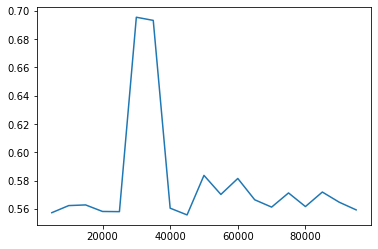

In [378]:
import numpy as np
from matplotlib import pyplot as plt

d = {}
for x in range(5000, 100000, 5000):
    d[x] = get_average_score(x)


lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [343]:
# Build UI that lets you pick the features to use. 

# Train n times and give average score + min/max score per year and total over the span of years used for validating.

{2016: 0.5841837309797322,
 2017: 0.5270035679014219,
 2018: 0.6269825819043252,
 2019: 0.517863598005087,
 -1: 0.5640083696976416}

In [289]:
[prediction.probability for prediction in span_predictions[2017]]

[0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156045891,
 0.5019441156

In [ ]:
# Teams with good defense: allow less points
# 3 point PCT
# Look at coaches